<a href="https://colab.research.google.com/github/anqxda/churn-prediction-project/blob/main/AI_Zee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-customer-churn' dataset.
Path to dataset files: /kaggle/input/bank-customer-churn


In [ ]:
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
print("Shape:", df.shape)

Shape: (10000, 18)


In [ ]:
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.min()

,0
RowNumber,1
CustomerId,15565701
Surname,Abazu
CreditScore,350
Geography,France
Gender,Female
Age,18
Tenure,0
Balance,0.0
NumOfProducts,1


In [ ]:
df.max()

,0
RowNumber,10000
CustomerId,15815690
Surname,Zuyeva
CreditScore,850
Geography,Spain
Gender,Male
Age,92
Tenure,10
Balance,250898.09
NumOfProducts,4


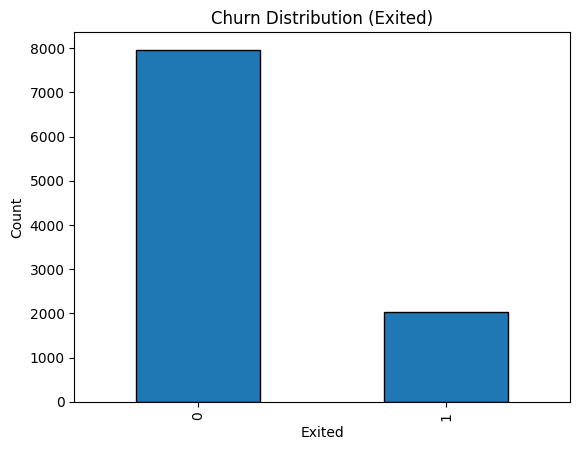

In [ ]:
# Target distribution
df['Exited'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Churn Distribution (Exited)'); plt.xlabel('Exited'); plt.ylabel('Count'); plt.show()


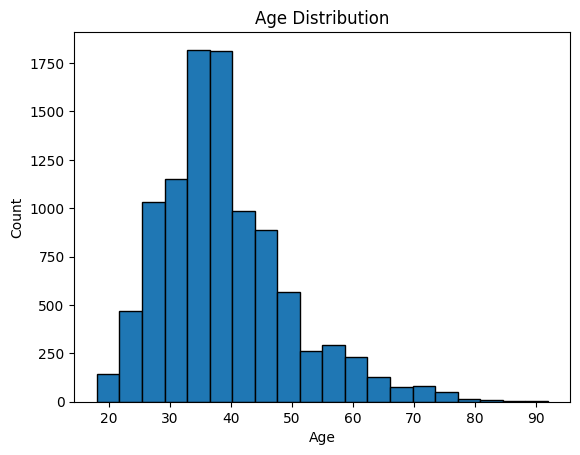

In [ ]:
# Age distribution
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution'); plt.xlabel('Age'); plt.ylabel('Count'); plt.show()


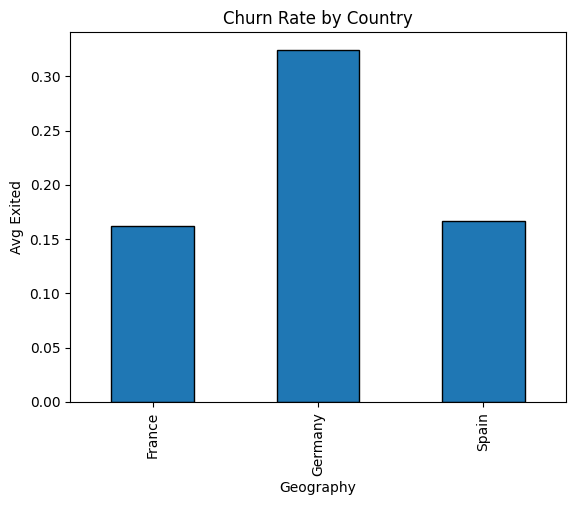

In [ ]:
# Churn rate by Geography (mean Exited)
df.groupby('Geography')['Exited'].mean().plot(kind='bar', edgecolor='black')
plt.title('Churn Rate by Country'); plt.xlabel('Geography'); plt.ylabel('Avg Exited'); plt.show()


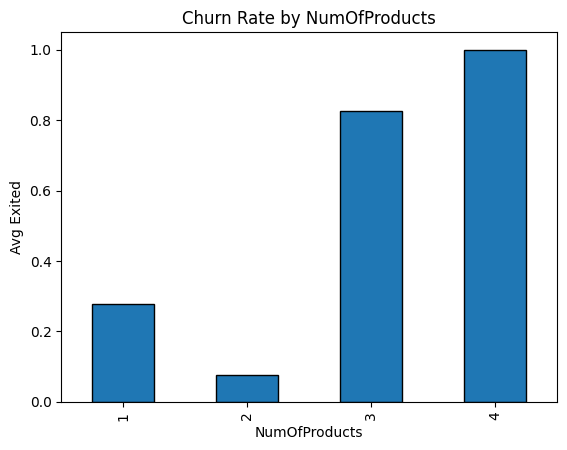

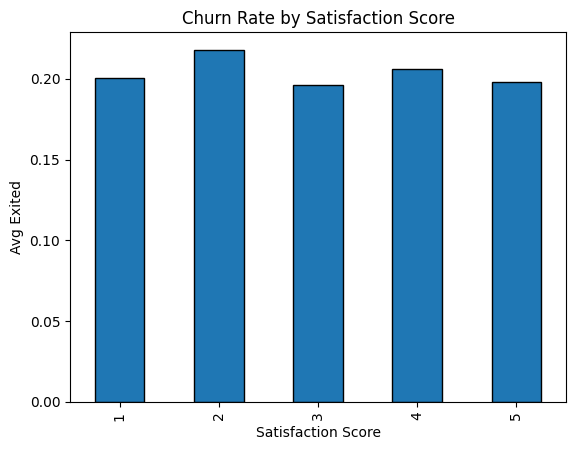

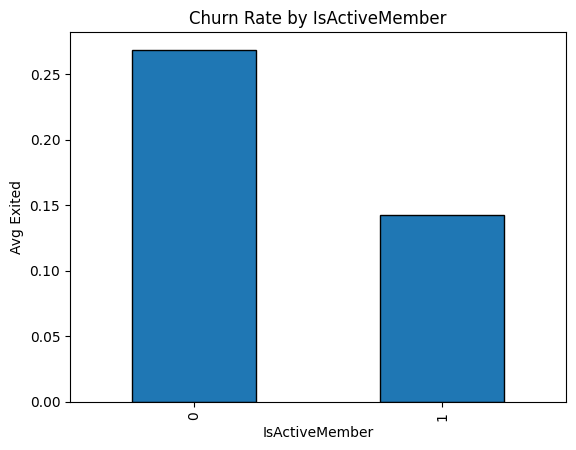

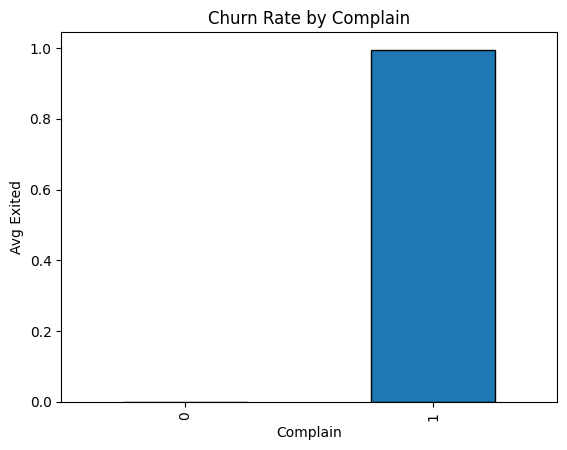

In [ ]:
# Churn rate by key features
for col in ['NumOfProducts','Satisfaction Score','IsActiveMember','Complain']:
    df.groupby(col)['Exited'].mean().plot(kind='bar', edgecolor='black')
    plt.title(f'Churn Rate by {col}'); plt.xlabel(col); plt.ylabel('Avg Exited'); plt.show()

/tmp/ipython-input-2331188980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(balance_bins)['Exited'].mean().plot(kind='bar', edgecolor='black')


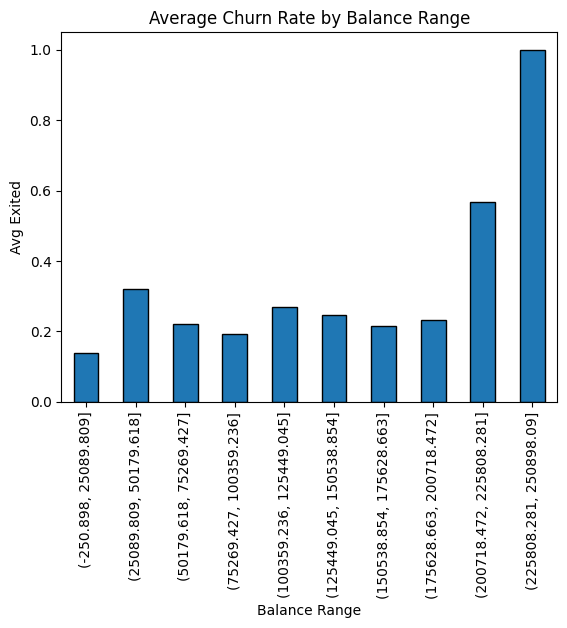

In [ ]:
# Balance vs Exited (binned for readability)
balance_bins = pd.cut(df['Balance'], bins=10)
df.groupby(balance_bins)['Exited'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Churn Rate by Balance Range'); plt.xlabel('Balance Range'); plt.ylabel('Avg Exited'); plt.show()


##Cleaning & Preprocessing

In [ ]:
drop_cols = ['RowNumber','CustomerId','Surname']
df_clean = df.drop(columns=drop_cols)

target_col = 'Exited'
cat_cols = ['Geography','Gender','Card Type']
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

from sklearn.preprocessing import StandardScaler
scale_cols = [c for c in ['CreditScore','Age','Tenure','Balance','EstimatedSalary',
                          'NumOfProducts','Satisfaction Score','Point Earned'] if c in X.columns]
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.fit_transform(X_scaled[scale_cols])

In [ ]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


##Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (8000, 17) Test: (2000, 17)


##Baseline & Compare Models


                       acc      prec       rec        f1
LogisticRegression  0.9985  0.997543  0.995098  0.996319
RandomForest        0.9985  0.997543  0.995098  0.996319
XGBoost             0.9985  0.997543  0.995098  0.996319


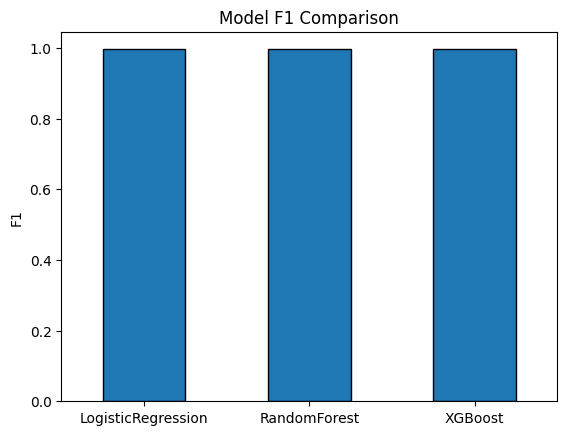

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=8, min_samples_split=5, min_samples_leaf=3,
        class_weight='balanced', random_state=42
    ),
}

# Try XGBoost if available
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(
        n_estimators=600, learning_rate=0.05, max_depth=5,
        subsample=0.9, colsample_bytree=0.9, eval_metric='logloss',
        random_state=42, tree_method='hist'
    )
except Exception as e:
    print("Skip XGBoost:", e)

def eval_model(m, Xtr, ytr, Xte, yte):
    m.fit(Xtr, ytr)
    pred = m.predict(Xte)
    return {
        "acc": accuracy_score(yte, pred),
        "prec": precision_score(yte, pred),
        "rec": recall_score(yte, pred),
        "f1": f1_score(yte, pred)
    }

res = {name: eval_model(m, X_train, y_train, X_test, y_test) for name,m in models.items()}
res_df = pd.DataFrame(res).T
print(res_df)
res_df['f1'].plot(kind='bar', edgecolor='black'); plt.title('Model F1 Comparison'); plt.ylabel('F1'); plt.xticks(rotation=0); plt.show()

##Confusion Matrix

Best Model: LogisticRegression
Accuracy: 0.9985
Classification Report:
               precision    recall  f1-score   support

           0      0.999     0.999     0.999      1592
           1      0.998     0.995     0.996       408

    accuracy                          0.999      2000
   macro avg      0.998     0.997     0.998      2000
weighted avg      0.998     0.999     0.998      2000



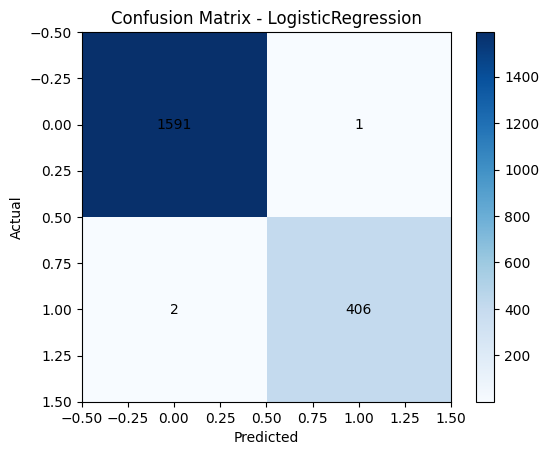

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
best_name = res_df['f1'].idxmax()
best_model = models[best_name]
y_pred = best_model.predict(X_test)

print(f"Best Model: {best_name}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))


cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues'); plt.title(f'Confusion Matrix - {best_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual')
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.colorbar(); plt.show()

##Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='f1')
print("CV F1 mean ± std:", cv_scores.mean(), "±", cv_scores.std())

CV F1 mean ± std: 0.9965805834528932 ± 0.004780965829681949


##Feature Importance

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=True)
    imp.tail(15).plot(kind='barh', edgecolor='black')
    plt.title(f'Top Feature Importances - {best_name}'); plt.xlabel('Importance'); plt.show()


##Predict New Customer

In [ ]:
def predict_customer(raw_dict):
    # ทำให้คอลัมน์ครบเหมือน X (หลัง one-hot)
    df_new = pd.DataFrame([raw_dict])

    # one-hot ให้ชื่อคอลัมน์ตรงกับตอน train
    df_new = pd.get_dummies(df_new, columns=cat_cols, drop_first=True)

    # เติมคอลัมน์ที่หายไปด้วย 0
    for col in X.columns:
        if col not in df_new.columns:
            df_new[col] = 0
    df_new = df_new[X.columns]  # จัดลำดับคอลัมน์ให้ตรง

    # scale คอลัมน์ตัวเลขด้วย scaler ที่ fit ไว้
    df_new_scaled = df_new.copy()
    df_new_scaled[scale_cols] = scaler.transform(df_new_scaled[scale_cols])

    pred = best_model.predict(df_new_scaled)[0]
    proba = (best_model.predict_proba(df_new_scaled)[0][1]
             if hasattr(best_model, "predict_proba") else None)
    return pred, proba


In [ ]:
example = {
    'CreditScore': 610, 'Geography':'Germany', 'Gender':'Male', 'Age':43,
    'Tenure':4, 'Balance':82000, 'NumOfProducts':1, 'HasCrCard':1,
    'IsActiveMember':0, 'EstimatedSalary':52000, 'Complain':0,
    'Satisfaction Score':3, 'Card Type':'SILVER', 'Point Earned':2600
}
pred, proba = predict_customer(example)
print("New customer prediction (1=churn):", pred, " | Probability of churn:", proba)

New customer prediction (1=churn): 0  | Probability of churn: 0.0005206716364937873
